# Machine Learning Engineer Nanodegree Capstone Project

# Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import chi2, SelectKBest, RFE
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from matplotlib import pylab
%matplotlib notebook
%matplotlib inline
pylab.rcParams['figure.figsize'] = (3, 3)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Reading the Dataset

In [2]:
df = pd.read_csv('bank-additional/bank-additional/bank-additional-full.csv', sep= ';')
num_col = len(list(df.columns))
pd.set_option('display.max_columns', num_col * 3)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [4]:
df.groupby('y').mean().T

y,no,yes
age,39.911185,40.913147
duration,220.844807,553.191164
campaign,2.633085,2.051724
pdays,984.113878,792.035560
previous,0.132374,0.492672
emp.var.rate,0.248875,-1.233448
cons.price.idx,93.603757,93.354386
cons.conf.idx,-40.593097,-39.789784
euribor3m,3.811491,2.123135
nr.employed,5176.166600,5095.115991


In [5]:
df.groupby('job').mean().T

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
age,38.187296,39.555760,41.723214,45.500000,42.362859,62.027326,39.949331,37.926430,25.894857,38.507638,39.733728,45.563636
duration,254.312128,264.542360,263.267857,250.454717,257.058140,273.712209,264.142153,258.398085,283.683429,250.232241,249.451677,239.675758
campaign,2.623489,2.558461,2.535714,2.639623,2.476060,2.476744,2.660802,2.587805,2.104000,2.577339,2.564103,2.648485
pdays,954.319229,985.160363,981.267170,960.579245,962.647059,897.936047,976.621393,979.974049,840.217143,964.408127,935.316568,938.727273
previous,0.189023,0.122542,0.138736,0.137736,0.185021,0.327326,0.143561,0.154951,0.524571,0.153789,0.199211,0.154545
emp.var.rate,0.015563,0.248995,0.158723,0.433396,-0.012688,-0.698314,0.094159,0.175359,-1.408000,0.274566,-0.111736,0.357879
cons.price.idx,93.534054,93.656656,93.605372,93.676576,93.522755,93.430786,93.559982,93.634659,93.331613,93.561471,93.563781,93.718942
cons.conf.idx,-40.245433,-41.375816,-41.283654,-39.495283,-40.489466,-38.573081,-40.488107,-41.290048,-40.187543,-39.927569,-40.007594,-38.797879
euribor3m,3.550274,3.771996,3.791120,4.009645,3.611316,2.770066,3.689376,3.699187,1.884224,3.820401,3.466583,3.949033
nr.employed,5164.125350,5175.615150,5176.313530,5179.529623,5166.650513,5122.262151,5170.674384,5171.600126,5085.939086,5175.648391,5157.156509,5172.931818


In [6]:
df.groupby('marital').mean().T

marital,divorced,married,single,unknown
age,44.899393,42.307165,33.158714,40.275000
duration,253.790330,257.438623,261.524378,312.725000
campaign,2.613400,2.572810,2.533800,3.187500
pdays,968.639853,967.247673,949.909578,937.100000
previous,0.168690,0.155608,0.211359,0.275000
emp.var.rate,0.163985,0.183625,-0.167989,-0.221250
cons.price.idx,93.606563,93.597367,93.517300,93.471250
cons.conf.idx,-40.707069,-40.270659,-40.918698,-40.820000
euribor3m,3.715603,3.745832,3.317447,3.313037
nr.employed,5170.878643,5171.848772,5155.199265,5157.393750


In [7]:
df.groupby('education').mean().T

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
age,47.596504,40.448953,39.061208,37.998213,48.500000,40.080107,38.879191,43.481225
duration,264.827826,264.414485,261.291811,260.886810,276.777778,252.533855,253.223373,262.390526
campaign,2.600575,2.556283,2.532341,2.568576,2.277778,2.586115,2.563527,2.596187
pdays,965.704981,980.368237,979.133168,964.358382,943.833333,960.765974,951.807692,942.830734
previous,0.147031,0.129145,0.141439,0.185917,0.111111,0.163075,0.192390,0.226459
emp.var.rate,0.215924,0.231152,0.159239,0.032937,-0.133333,0.173012,-0.028090,0.059099
cons.price.idx,93.658309,93.650062,93.623399,93.584857,93.317333,93.569864,93.493466,93.658615
cons.conf.idx,-40.239871,-41.127880,-41.326749,-40.940641,-39.950000,-40.124108,-39.975805,-39.877816
euribor3m,3.751768,3.772942,3.697963,3.556157,3.516556,3.710457,3.529663,3.571098
nr.employed,5170.124880,5174.718063,5172.294012,5164.994735,5171.777778,5170.155979,5163.226298,5159.549509


# Exploratory Visualization

Ratio of classes (no : yes) 0.887345828882 : 0.112654171118


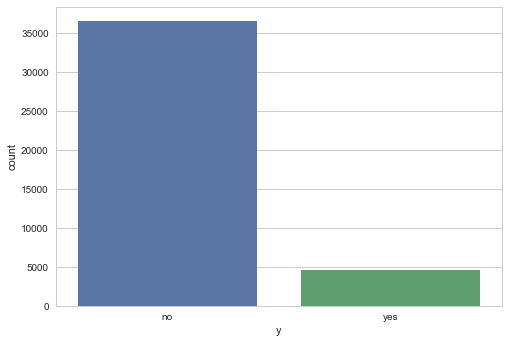

In [8]:
ratio = df.y[df.y == "yes"].count() / df.y.shape[0]
print('Ratio of classes (no : yes)', 1- ratio, ':', ratio)
sns.countplot(df.y)
plt.show()

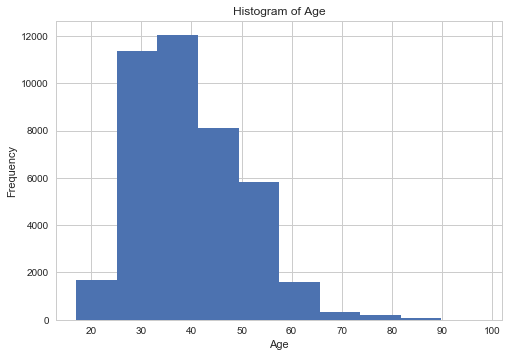

In [9]:
df.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

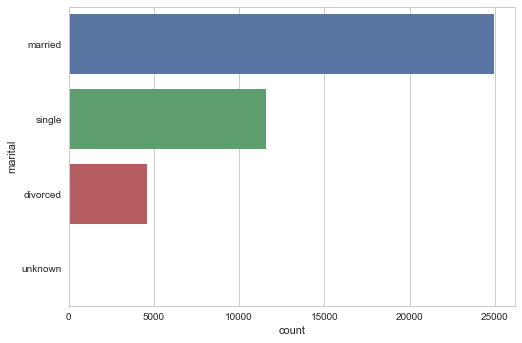

In [10]:
sns.countplot(y = df.marital, data = df)
plt.show()

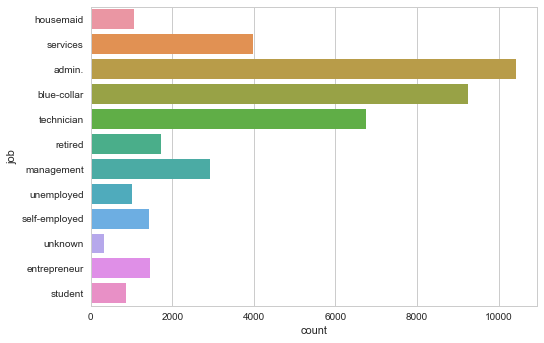

In [11]:
sns.countplot(y = df.job, data = df)
plt.show()

# Looking for interesting facts

In [12]:
# lets get some more understanding of data and relationships
print('check 1: ', df.groupby(['loan','y']).size())
print('\n\ncheck 2: ', df.groupby(['job','y']).size())
print('\n\ncheck 3: ', df.groupby(['marital','y']).size())
print('\n\ncheck 4: ', df.groupby(['education','y']).size())
print('\n\ncheck 5: ', df.groupby(['poutcome','y']).size())
print('\n\ncheck 6: ', df.groupby(['month','y']).size())
print('\n\ncheck 7: ', df.groupby(['y', 'default']).size())

check 1:  loan     y  
no       no     30100
         yes     3850
unknown  no       883
         yes      107
yes      no      5565
         yes      683
dtype: int64


check 2:  job            y  
admin.         no     9070
               yes    1352
blue-collar    no     8616
               yes     638
entrepreneur   no     1332
               yes     124
housemaid      no      954
               yes     106
management     no     2596
               yes     328
retired        no     1286
               yes     434
self-employed  no     1272
               yes     149
services       no     3646
               yes     323
student        no      600
               yes     275
technician     no     6013
               yes     730
unemployed     no      870
               yes     144
unknown        no      293
               yes      37
dtype: int64


check 3:  marital   y  
divorced  no      4136
          yes      476
married   no     22396
          yes     2532
single    no      9948

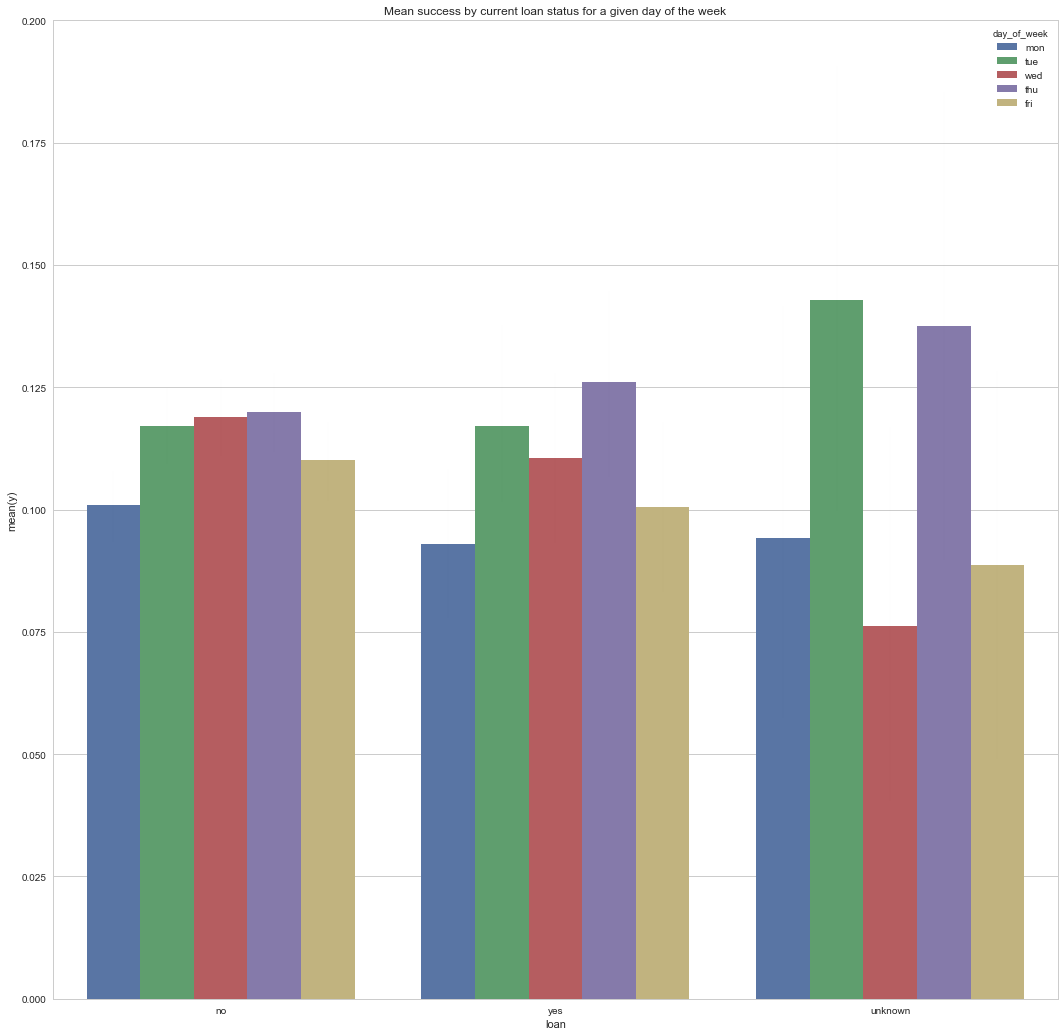

In [13]:
#Label Encoding the class attribute
label_encoder = LabelEncoder()
label_encoder.fit(df["y"])
df["y"] = label_encoder.transform(df["y"])

pylab.rcParams['figure.figsize'] = (18, 18)
sns.barplot(x = 'loan', y = 'y', hue = 'day_of_week', data = df, ci=95, errwidth = 0.01)
plt.title('Mean success by current loan status for a given day of the week')
plt.show()

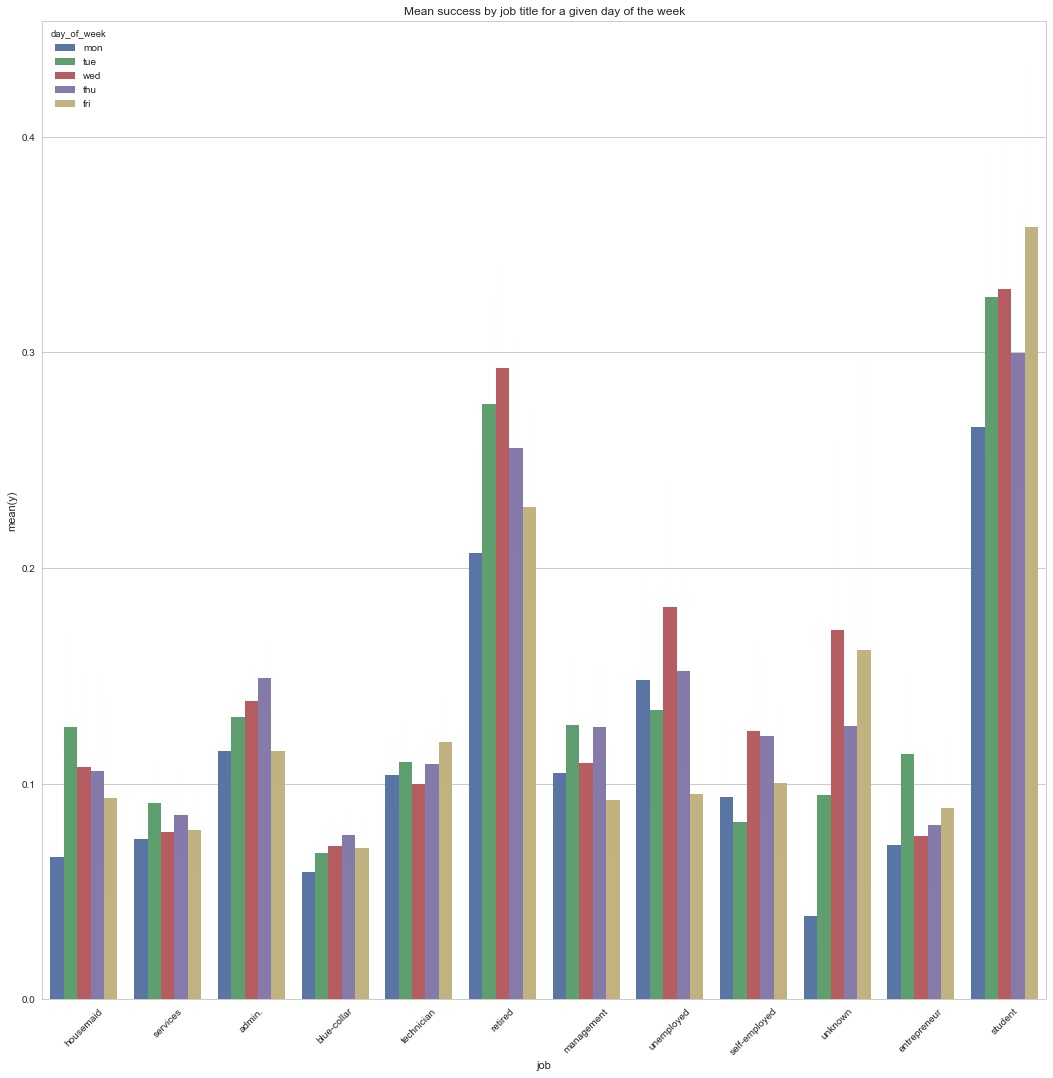

In [14]:
pylab.rcParams['figure.figsize'] = (18, 18)
sns.barplot(x = 'job', y = 'y', hue = 'day_of_week', data = df, ci=95, errwidth = 0.01)
plt.xticks(rotation=45)
plt.title('Mean success by job title for a given day of the week')
plt.show()

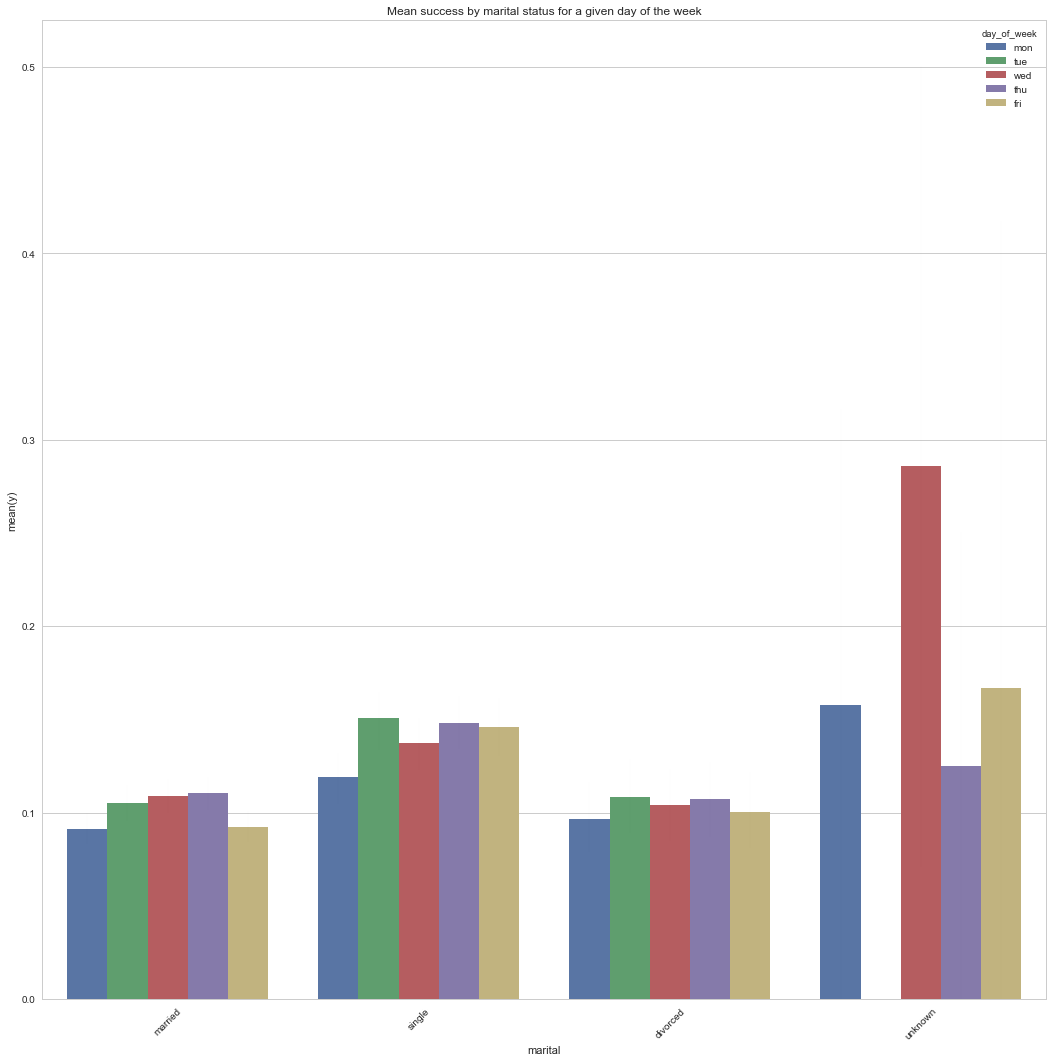

In [15]:
pylab.rcParams['figure.figsize'] = (18, 18)
sns.barplot(x = 'marital', y = 'y', hue = 'day_of_week', data = df, ci=95, errwidth = 0.01)
plt.xticks(rotation=45)
plt.title('Mean success by marital status for a given day of the week')
plt.show()

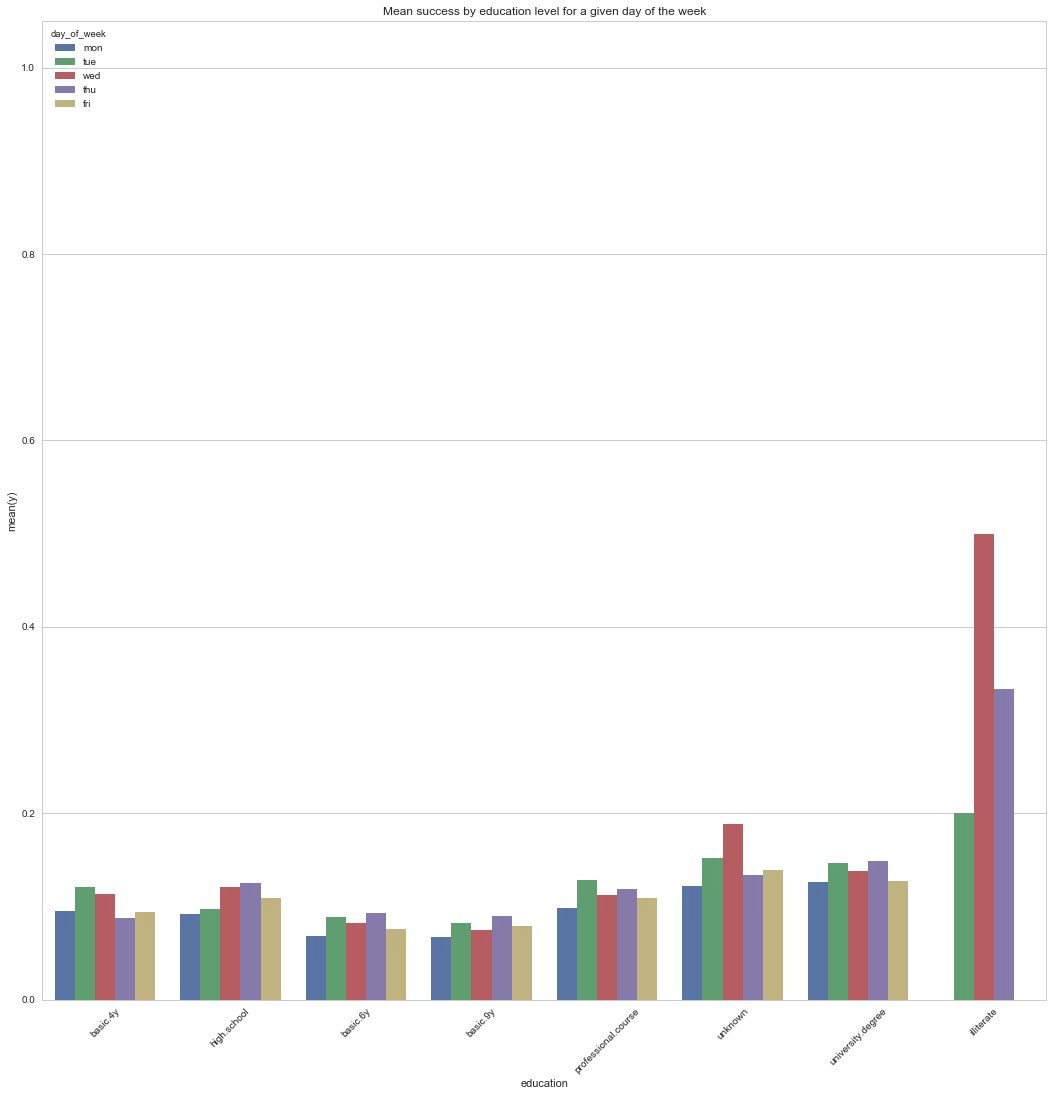

In [16]:
pylab.rcParams['figure.figsize'] = (18, 18)
sns.barplot(x = 'education', y = 'y', hue = 'day_of_week', data = df, ci=95, errwidth = 0.01)
plt.xticks(rotation=45)
plt.title('Mean success by education level for a given day of the week')
plt.show()

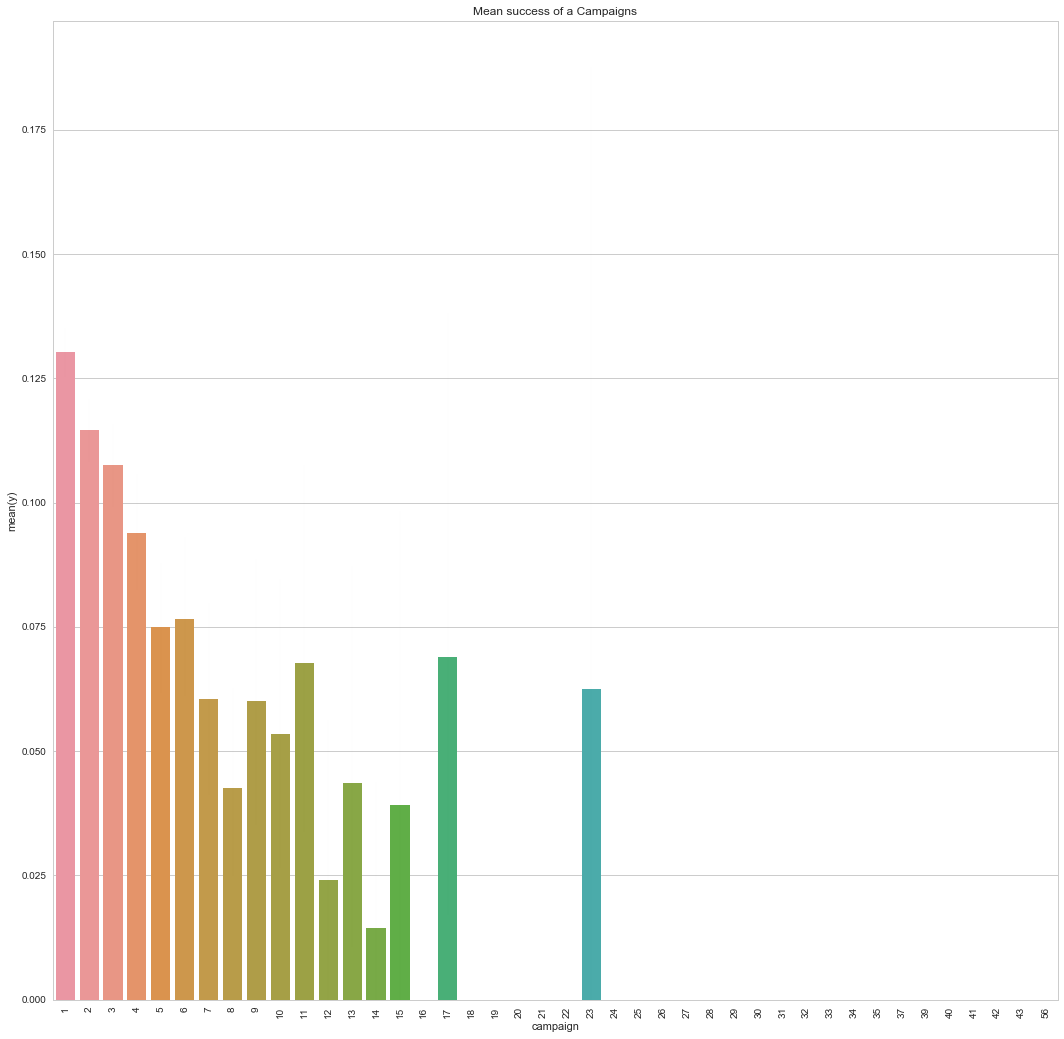

In [17]:
# Performance of Campaigns
sns.barplot(x="campaign", y="y", data=df, ci=95, errwidth = 0.01)
plt.xticks(rotation=90)
plt.title('Mean success of a Campaigns')
plt.show()

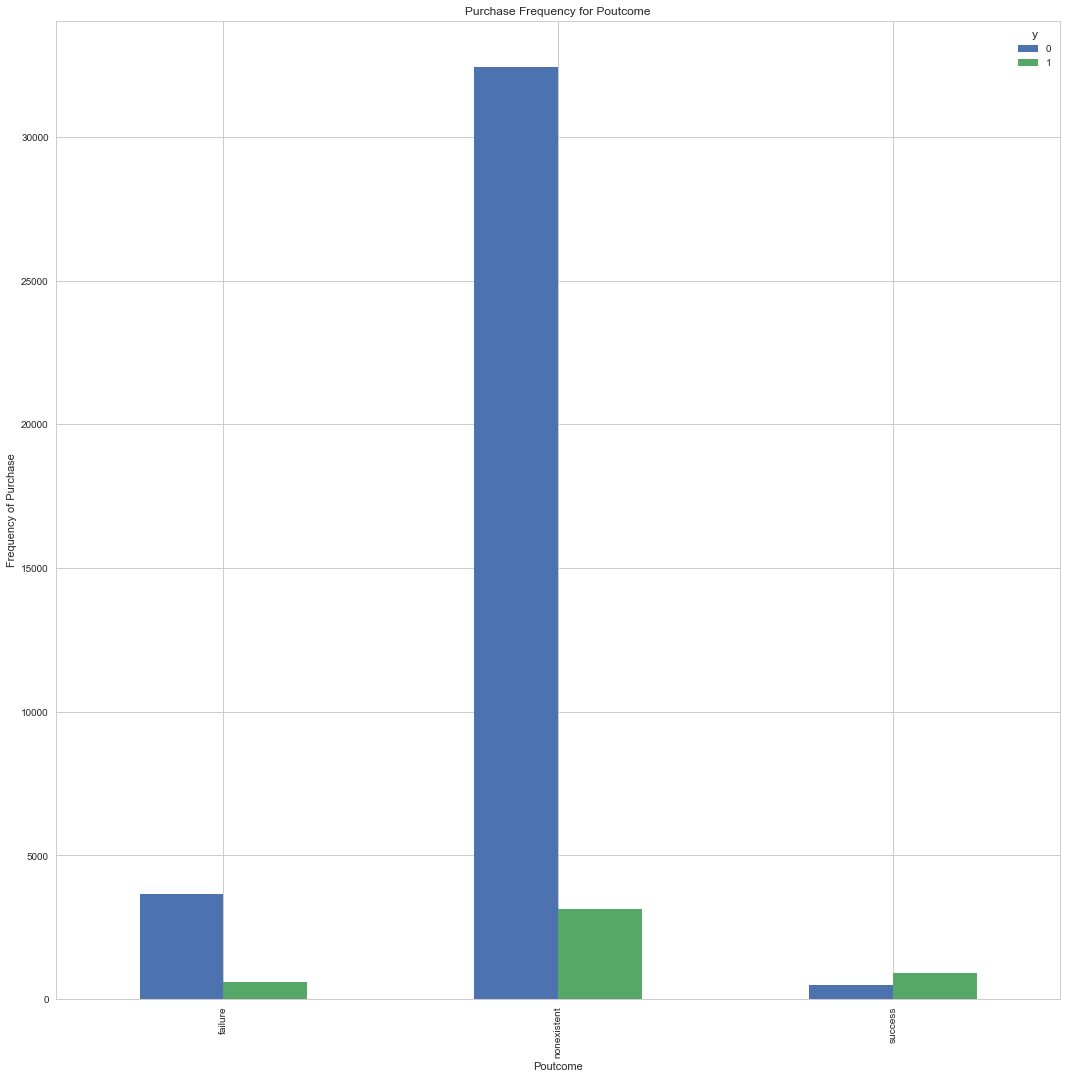

In [18]:
pd.crosstab(df.poutcome, df.y).plot(kind= 'bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.show()

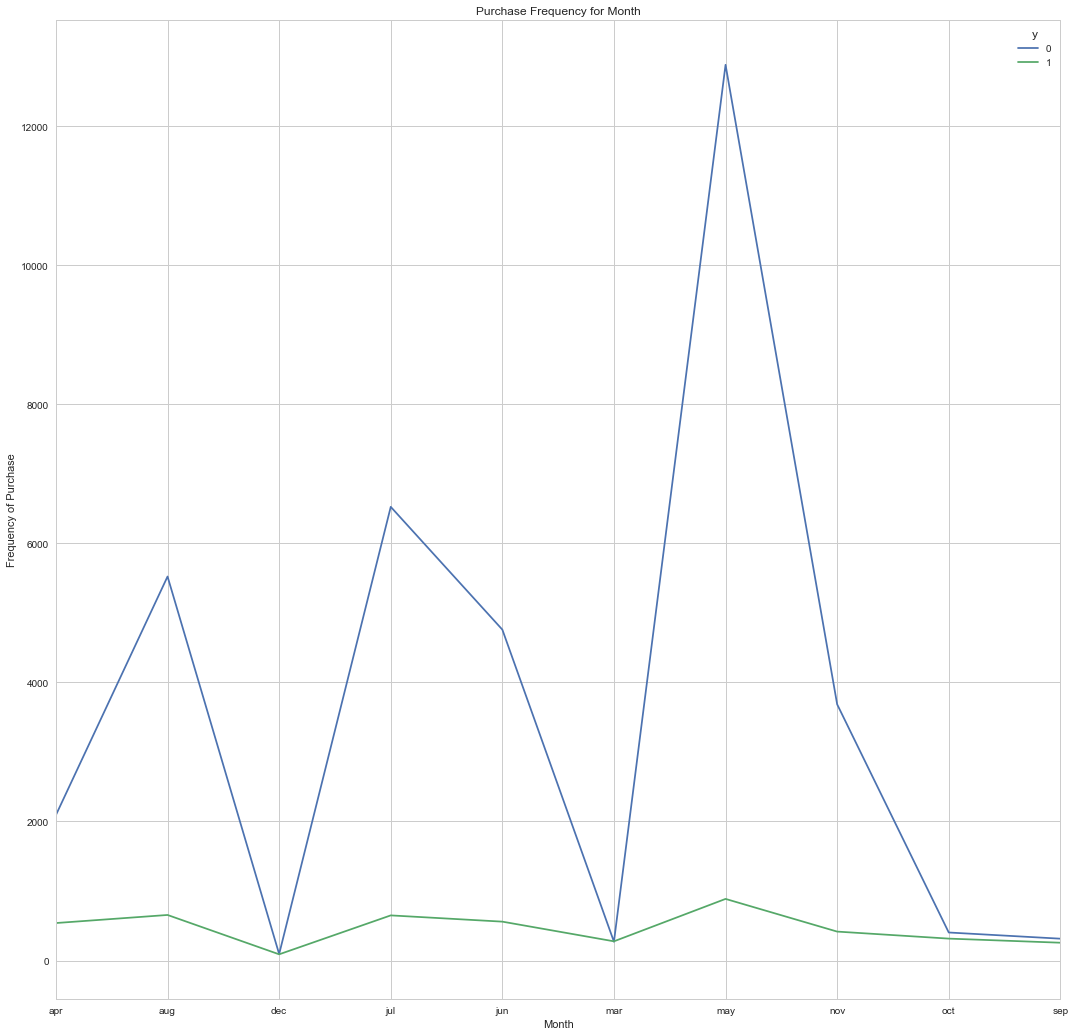

In [19]:
pd.crosstab(df.month, df.y).plot(kind='line')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.show()

# Feature Engineering

In [20]:
df["dur"] = pd.Series(df["duration"] != 0)

# Label Encoding the Binary Attributes

In [21]:
labels = ['housing', 'default', 'loan']
for label in labels:
    label_encoder = LabelEncoder()
    label_encoder.fit(df[label])
    df[label] = label_encoder.transform(df[label])

In [22]:
# Will be On-Hot Encoded Later
cols = ['job', 'contact', 'marital','education', 'poutcome', 'month', 'day_of_week']
for label in cols:
    label_encoder = LabelEncoder()
    label_encoder.fit(df[label])
    df[label] = label_encoder.transform(df[label])

In [23]:
df_corr = df.corr()

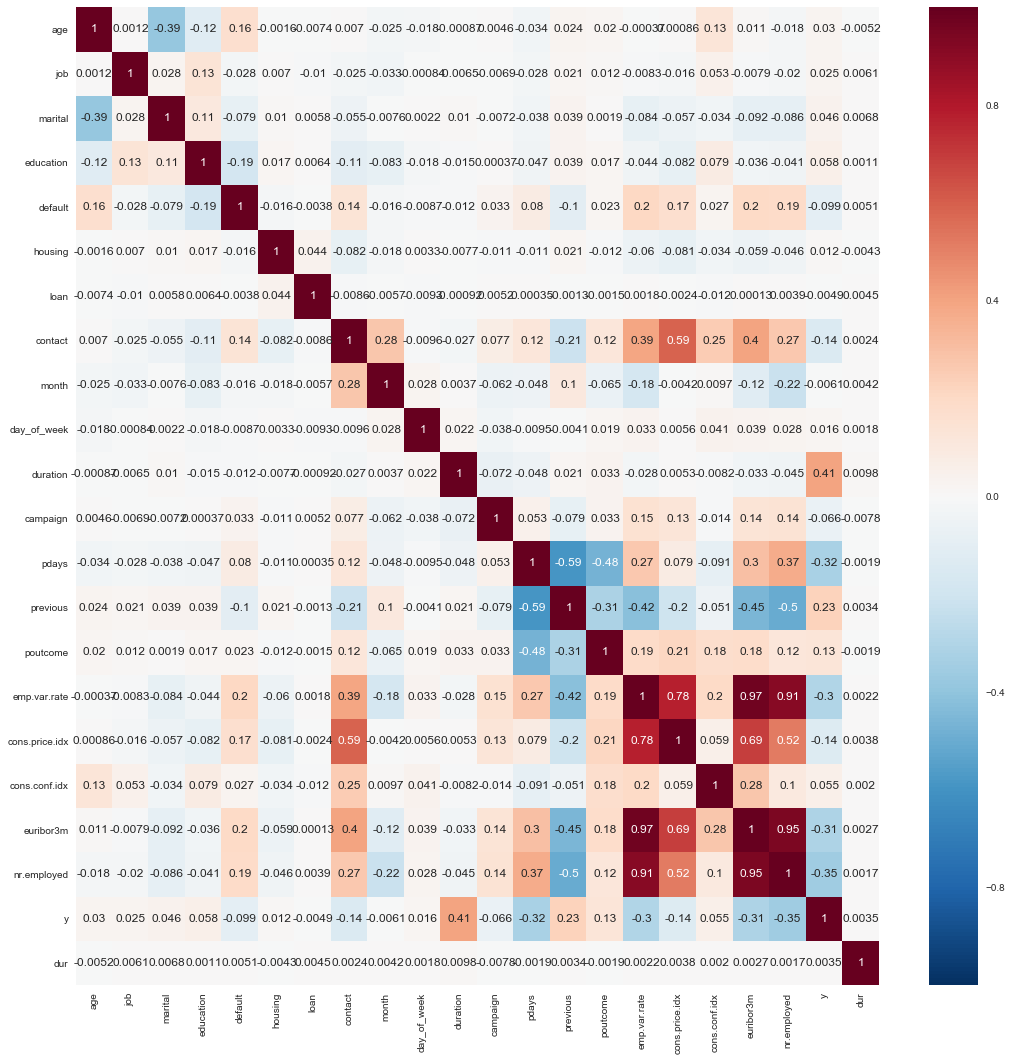

In [24]:
plt.figure(figsize=(18, 18))
sns.heatmap(df_corr, annot = True)
plt.show()

- From the above plot we can observe that most of the features are independent of each other.
- Feature-pairs (emp.var.rate - cons.price.idx), (emp.var.rate - euribor3m), (emp.var.rate - nr.employed), (nr.employed - euribor3m) and (cons.price.idx - euribor3m) are highly positively correlated.
- Therefore we can remove "emp.var.rate", "cons.price.idx", "nr.employed"

In [25]:
final_df = df.drop(["emp.var.rate", "cons.price.idx", "nr.employed"], axis = 1)

In [26]:
df_corr = final_df.corr()

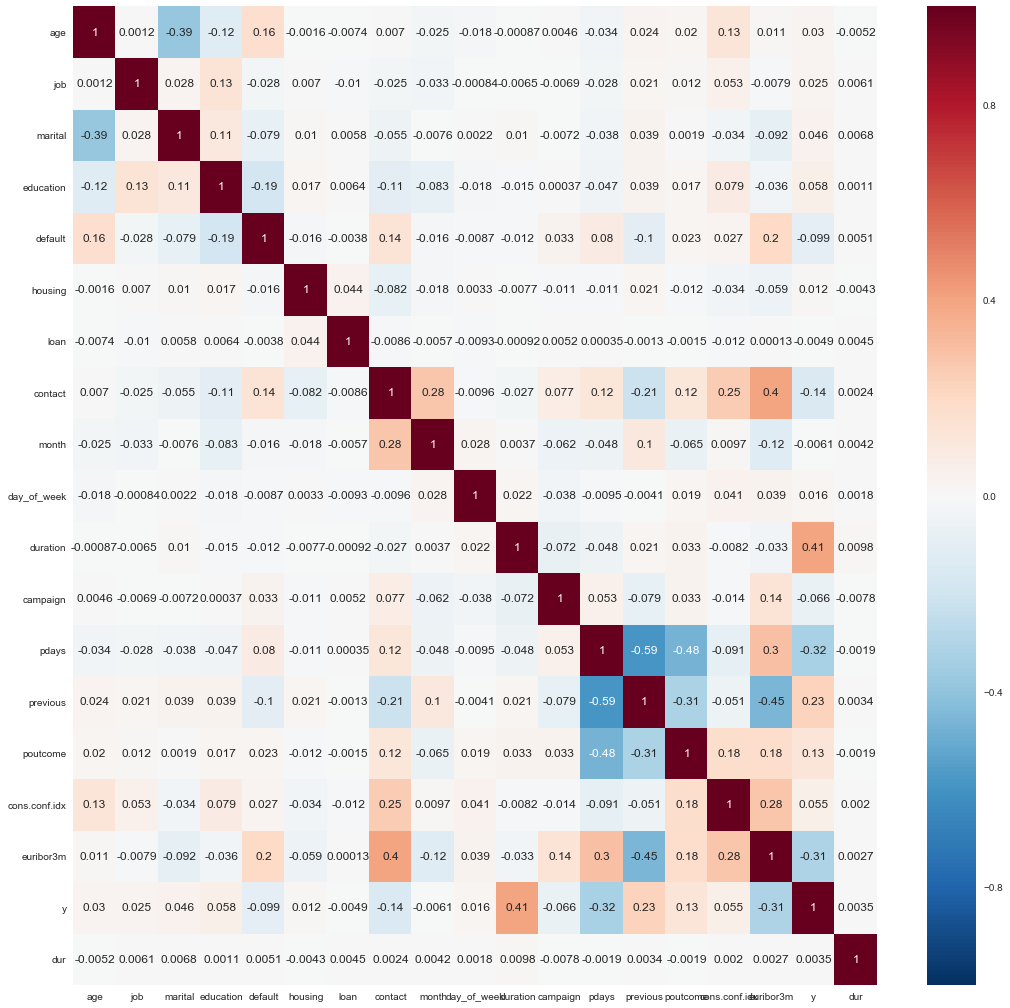

In [27]:
plt.figure(figsize=(18, 18))
sns.heatmap(df_corr, annot = True)
plt.show()

In [28]:
df = pd.get_dummies(final_df, columns = cols)

In [29]:
df.head()

,age,default,housing,loan,duration,campaign,pdays,previous,cons.conf.idx,euribor3m,y,dur,job_0,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,job_10,job_11,contact_0,contact_1,marital_0,marital_1,marital_2,marital_3,education_0,education_1,education_2,education_3,education_4,education_5,education_6,education_7,poutcome_0,poutcome_1,poutcome_2,month_0,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4
0,56,0,0,0,261,1,999,0,-36.4,4.857,0,True,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,57,1,0,0,149,1,999,0,-36.4,4.857,0,True,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,37,0,2,0,226,1,999,0,-36.4,4.857,0,True,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,40,0,0,0,151,1,999,0,-36.4,4.857,0,True,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,56,0,0,2,307,1,999,0,-36.4,4.857,0,True,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
default,41188.0,0.208872,0.406686,0.000,0.000,0.000,0.000,2.000
housing,41188.0,1.071720,0.985314,0.000,0.000,2.000,2.000,2.000
loan,41188.0,0.327425,0.723616,0.000,0.000,0.000,0.000,2.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045


# Normalizing the Features

In [31]:
labels = df.y
scaler = MinMaxScaler()
features = pd.DataFrame(scaler.fit_transform(df.drop(['y'], axis = 1)), columns = df.drop(['y'], axis = 1).columns)

In [32]:
features.head()

,age,default,housing,loan,duration,campaign,pdays,previous,cons.conf.idx,euribor3m,dur,job_0,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,job_10,job_11,contact_0,contact_1,marital_0,marital_1,marital_2,marital_3,education_0,education_1,education_2,education_3,education_4,education_5,education_6,education_7,poutcome_0,poutcome_1,poutcome_2,month_0,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4
0,0.481481,0.0,0.0,0.0,0.053070,0.0,1.0,0.0,0.60251,0.957379,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.493827,0.5,0.0,0.0,0.030297,0.0,1.0,0.0,0.60251,0.957379,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.246914,0.0,1.0,0.0,0.045954,0.0,1.0,0.0,0.60251,0.957379,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.283951,0.0,0.0,0.0,0.030704,0.0,1.0,0.0,0.60251,0.957379,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.481481,0.0,0.0,1.0,0.062424,0.0,1.0,0.0,0.60251,0.957379,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Splitting Data into Training and Testing data

In [18]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=1, stratify = labels)

In [19]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 1)

In [20]:
# DataFrame to store results
testing = pd.DataFrame(columns = ["Classifier", "F1-Score", "AUC", "Accuracy"])

# Logistic Regression

In [21]:
params = [
            {
                "penalty" : ['l2'], 
                "C" : [0.01, 0.1, 1.0, 10.0], 
                "solver" : ["sag"], 
                "max_iter" : [100, 200]
            },
            {
                "penalty" : ['l1'], 
                "C" : [0.01, 0.1, 1.0, 10.0], 
                "solver" : ["saga"], 
                "max_iter" : [100, 200]
            }
]
clf = GridSearchCV(estimator = LogisticRegression(n_jobs = -1, class_weight = "balanced"), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "f1")
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=-1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'C': [0.01, 0.1, 1.0, 10.0], 'max_iter': [100, 200], 'solver': ['sag'], 'penalty': ['l2']}, {'C': [0.01, 0.1, 1.0, 10.0], 'max_iter': [100, 200], 'solver': ['saga'], 'penalty': ['l1']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [22]:
clf.best_params_

{'C': 1.0, 'max_iter': 200, 'penalty': 'l1', 'solver': 'saga'}

In [23]:
clf.best_score_

0.59012566364638652

In [24]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Logistic Regression", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.585
Area under ROC on test data is : 0.861
Accuracy on test data is : 0.863


# Decision Tree Classifier

In [25]:
params = {
            "criterion" : ["gini", "entropy"], 
            "splitter" : ["best", "random"], 
            "max_depth" : [20, 40, None],
            "min_samples_split" : [3, 6], 
            "min_samples_leaf" : [2, 4],  
        }
clf = GridSearchCV(estimator = DecisionTreeClassifier(class_weight = "balanced", presort = True), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "f1")
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=True, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 6], 'min_samples_leaf': [2, 4], 'max_depth': [20, 40, None], 'splitter': ['best', 'random'], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [26]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 40,
 'min_samples_leaf': 4,
 'min_samples_split': 3,
 'splitter': 'best'}

In [27]:
clf.best_score_

0.57732955773180039

In [28]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Decision Tree", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.578
Area under ROC on test data is : 0.818
Accuracy on test data is : 0.878


# Random Forest Classifier

In [ ]:
params = {
            "n_estimators" : [100, 200], 
            "criterion" : ["gini", "entropy"], 
            "max_depth" : [20, 40, None],
            "min_samples_split" : [3, 6], 
            "min_samples_leaf" : [2, 4]
}
clf = GridSearchCV(estimator = RandomForestClassifier(class_weight = "balanced", n_jobs = -1), param_grid = params, cv = cv, n_jobs = -1, scoring = "f1")
clf.fit(X_train, y_train)

In [30]:
f1_score(y_test, clf.predict(X_test))

0.65288868013151713

In [31]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 40,
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 200}

In [32]:
clf.best_score_

0.64672100335837801

In [33]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Random Forest", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.653
Area under ROC on test data is : 0.840
Accuracy on test data is : 0.910


# AdaBoost Classifier

In [34]:
params = {
            "base_estimator": [DecisionTreeClassifier(class_weight = "balanced"), 
                               LogisticRegression(n_jobs = -1, class_weight = 'balanced', penalty = 'l1', solver = 'saga')], 
            "learning_rate" : [0.01, 0.1, 1.0]
        }
clf = GridSearchCV(estimator = AdaBoostClassifier(n_estimators = 1000), param_grid = params, cv = cv, n_jobs = -1, 
                   scoring = "f1")
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
       error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=1000, random_state=None),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'base_estimator': [DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_we...        solver='saga', tol=0.0001, verbose=0, warm_start=False)], 'learning_rate': [0.01, 0.1, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [35]:
clf.best_params_

{'base_estimator': DecisionTreeClassifier(class_weight='balanced', criterion='gini',
             max_depth=None, max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
             splitter='best'), 'learning_rate': 1.0}

In [36]:
clf.best_score_

0.51081107455780972

In [37]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["AdaBoost", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.506
Area under ROC on test data is : 0.715
Accuracy on test data is : 0.893


# Gaussian Naive Bayes

In [38]:
params = {}
clf = GridSearchCV(estimator = GaussianNB(), param_grid = params, cv = cv, n_jobs = -1, scoring = "f1")
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
       error_score='raise', estimator=GaussianNB(priors=None),
       fit_params=None, iid=True, n_jobs=-1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [39]:
clf.best_score_

0.4333456282447059

In [40]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Gaussian Naive Bayes", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.420
Area under ROC on test data is : 0.726
Accuracy on test data is : 0.807


# Multinomial Naive Bayes

In [41]:
params = {
            "alpha" : [0.0, 0.1, 0.5, 1.0], 
            "fit_prior" : [True, False]
         }
clf = GridSearchCV(estimator = MultinomialNB(), param_grid = params, cv = cv, n_jobs = -1, scoring = "f1")
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
       error_score='raise',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'fit_prior': [True, False], 'alpha': [0.0, 0.1, 0.5, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [42]:
clf.best_params_

{'alpha': 0.1, 'fit_prior': False}

In [43]:
clf.best_score_

0.39393712706220074

In [44]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Multinomial Naive Bayes", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.384
Area under ROC on test data is : 0.714
Accuracy on test data is : 0.766


# Multi Layer Perceptron

In [45]:
params = [
            {
                "hidden_layer_sizes" : [(50, ), (50, 50), (50, 50, 50)],
                "solver" : ["adam", "lbfgs"]
            },
            {
                "hidden_layer_sizes" : [(50, ), (50, 50), (50, 50, 50)],
                "solver" : ["sgd"], 
                "learning_rate" : ["constant", "invscaling", "adaptive"]
            }
]
clf = GridSearchCV(estimator = MLPClassifier(early_stopping = True, activation = "relu", max_iter = 100), param_grid = params, 
                   cv = cv, n_jobs = -1, scoring = "f1")
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
       error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'hidden_layer_sizes': [(50,), (50, 50), (50, 50, 50)], 'solver': ['adam', 'lbfgs']}, {'hidden_layer_sizes': [(50,), (50, 50), (50, 50, 50)], 'solver': ['sgd'], 'learning_rate': ['constant', 'invscaling', 'adaptive']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [46]:
clf.best_params_

{'hidden_layer_sizes': (50, 50), 'solver': 'lbfgs'}

In [47]:
clf.best_score_

0.57192544273230639

In [48]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Multi Layer Perceptron", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.577
Area under ROC on test data is : 0.744
Accuracy on test data is : 0.913


# Support Vector Machine

In [49]:
params = [
            {"C" : [0.1, 1.0], "kernel" : ["poly"],
              "degree" : [2, 3, 4],
              "gamma" : [0.002, "auto", 0.2]
            },
            {"C" : [0.1, 1.0], "kernel" : ["rbf", "sigmoid"], 
              "gamma" : [0.002, "auto", 0.2]},
            {"C" : [0.1, 1.0], "kernel" : ["linear"]}
        ]
clf = GridSearchCV(estimator = SVC(class_weight = "balanced", max_iter = 10000, verbose = True), param_grid = params, 
                   cv = cv, n_jobs = -1, scoring = "f1", verbose = 2)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed: 69.8min finished


[LibSVM]

C:\Python35\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'degree': [2, 3, 4], 'gamma': [0.002, 'auto', 0.2], 'C': [0.1, 1.0], 'kernel': ['poly']}, {'gamma': [0.002, 'auto', 0.2], 'C': [0.1, 1.0], 'kernel': ['rbf', 'sigmoid']}, {'C': [0.1, 1.0], 'kernel': ['linear']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=2)

In [50]:
clf.best_params_

{'C': 1.0, 'degree': 2, 'gamma': 0.2, 'kernel': 'poly'}

In [51]:
clf.best_score_

0.5826396851437704

In [52]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Support Vector Machine", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.564
Area under ROC on test data is : 0.860
Accuracy on test data is : 0.848


In [53]:
testing

,Classifier,F1-Score,AUC,Accuracy
0,Support Vector Machine,0.564281,0.859661,0.847779
1,Multi Layer Perceptron,0.576651,0.744386,0.912843
2,Multinomial Naive Bayes,0.383728,0.713640,0.766448
3,Gaussian Naive Bayes,0.420401,0.726068,0.806871
4,AdaBoost,0.505605,0.715294,0.892935
5,Random Forest,0.652889,0.839851,0.910294
6,Decision Tree,0.577554,0.817894,0.878004
7,Logistic Regression,0.584649,0.860548,0.862709


# Feature Selection

In [18]:
chivalues = chi2(features, labels)[0]
chi = pd.DataFrame(list(zip(df.drop(["y"], axis = 1).columns, chivalues)), columns = ["Features", "chi2"])

In [19]:
chi

,Features,chi2
0,age,2.216388
1,default,160.961452
2,housing,2.489367
3,loan,0.793502
4,duration,358.018123
5,campaign,16.140129
6,pdays,157.983753
7,previous,441.453204
8,cons.conf.idx,10.795785
9,euribor3m,890.685536


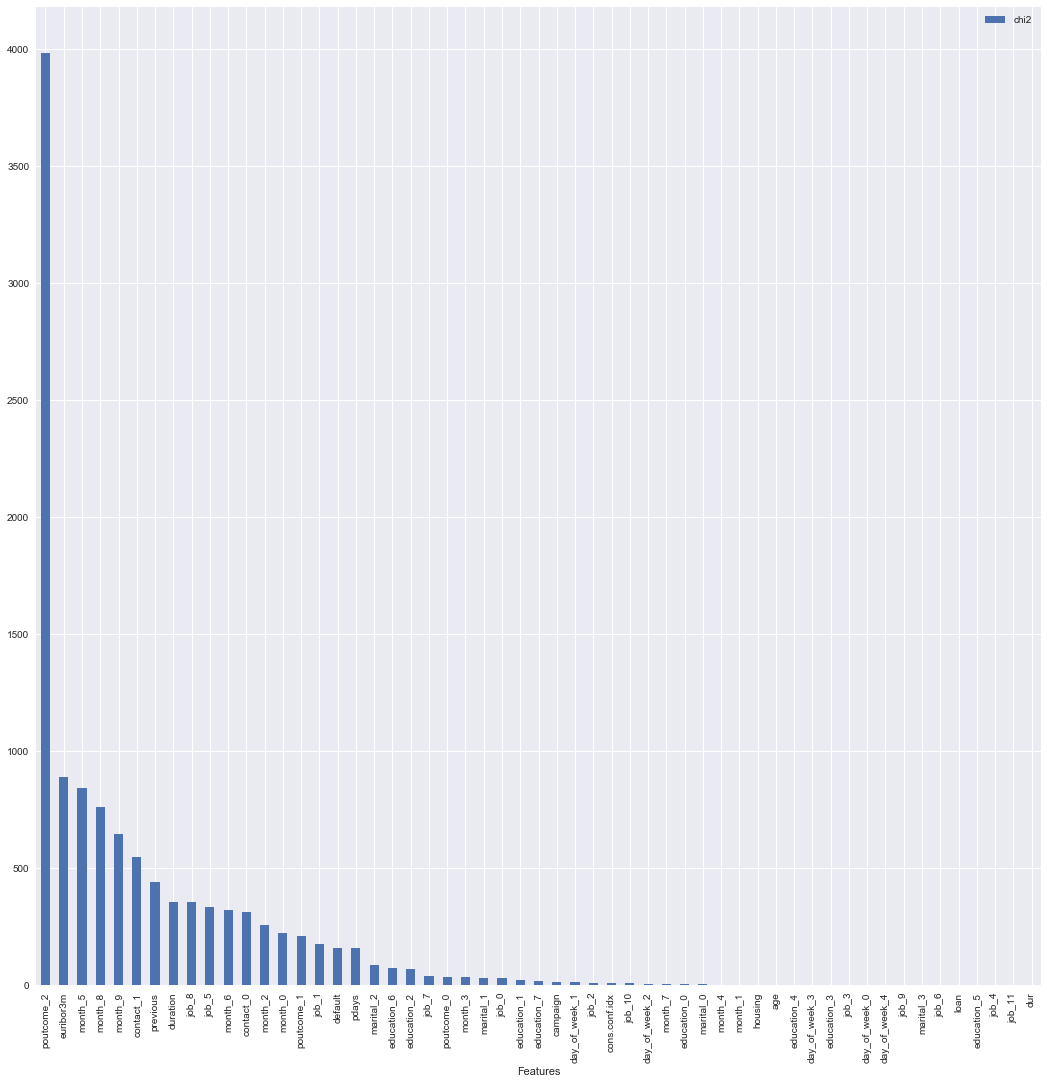

In [20]:
chi.sort_values(by = "chi2", ascending = False).set_index("Features").plot.bar(figsize = (18, 18))

We can clearly see that the chi2 drops to almost zero after the first 25 features.

In [54]:
k_best_features = pd.DataFrame(SelectKBest(chi2, k=25).fit_transform(features, labels))

In [55]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 1)

In [56]:
# DataFrame to store results
ktesting = pd.DataFrame(columns = ["Classifier", "F1-Score", "AUC", "Accuracy"])

In [57]:
X_train, X_test, y_train, y_test = train_test_split(k_best_features, labels, test_size=0.2, random_state=1, stratify = labels)

# Logistic Regression

In [58]:
params = [
            {
                "penalty" : ['l2'], 
                "C" : [0.01, 0.1, 1.0], 
                "solver" : ["sag"], 
                "max_iter" : [100, 200]
            },
            {
                "penalty" : ['l1'], 
                "C" : [0.01, 0.1, 1.0, 10.0], 
                "solver" : ["saga"], 
                "max_iter" : [100, 200]
            }
]
clf = GridSearchCV(estimator = LogisticRegression(n_jobs = -1, class_weight = "balanced"), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "f1")
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=-1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'C': [0.01, 0.1, 1.0], 'max_iter': [100, 200], 'solver': ['sag'], 'penalty': ['l2']}, {'C': [0.01, 0.1, 1.0, 10.0], 'max_iter': [100, 200], 'solver': ['saga'], 'penalty': ['l1']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [59]:
clf.best_params_

{'C': 10.0, 'max_iter': 200, 'penalty': 'l1', 'solver': 'saga'}

In [60]:
clf.best_score_

0.58818716639025415

In [62]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

ktesting.loc[-1] = ["Logistic Regression", f1, auc, acc]
ktesting.index = ktesting.index + 1
ktesting = ktesting.sort_index()

F1-Score on test data is : 0.581
Area under ROC on test data is : 0.859
Accuracy on test data is : 0.861


# Decision Tree Classifier

In [63]:
params = {
            "criterion" : ["gini", "entropy"], 
            "splitter" : ["best", "random"], 
            "max_depth" : [10, 15, 20, None],
            "min_samples_split" : [3, 6], 
            "min_samples_leaf" : [2, 4],  
        }
clf = GridSearchCV(estimator = DecisionTreeClassifier(class_weight = "balanced", presort = True), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "f1")
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=True, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 6], 'min_samples_leaf': [2, 4], 'max_depth': [10, 15, 20, None], 'splitter': ['best', 'random'], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [64]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'min_samples_leaf': 4,
 'min_samples_split': 3,
 'splitter': 'best'}

In [65]:
clf.best_score_

0.5799266426915044

In [66]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

ktesting.loc[-1] = ["Decision Tree", f1, auc, acc]
ktesting.index = ktesting.index + 1
ktesting = ktesting.sort_index()

F1-Score on test data is : 0.573
Area under ROC on test data is : 0.828
Accuracy on test data is : 0.870


# Random Forest Classifier

In [67]:
params = {
            "n_estimators" : [100, 200], 
            "criterion" : ["gini", "entropy"], 
            "max_depth" : [15, 25, None],
            "min_samples_split" : [3, 6], 
            "min_samples_leaf" : [2, 4]
}
clf = GridSearchCV(estimator = RandomForestClassifier(class_weight = "balanced", n_jobs = -1), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "f1")
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 6], 'min_samples_leaf': [2, 4], 'n_estimators': [100, 200], 'max_depth': [15, 25, None], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [68]:
f1_score(y_test, clf.predict(X_test))

0.63831692032229181

In [69]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 200}

In [70]:
clf.best_score_

0.63742906374203101

In [71]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

ktesting.loc[-1] = ["Random Forest", f1, auc, acc]
ktesting.index = ktesting.index + 1
ktesting = testing.sort_index()

F1-Score on test data is : 0.638
Area under ROC on test data is : 0.844
Accuracy on test data is : 0.902


# AdaBoost Classifier

In [72]:
params = {
            "base_estimator": [DecisionTreeClassifier(class_weight = "balanced"), 
                               LogisticRegression(n_jobs = -1, class_weight = 'balanced')], 
            "learning_rate" : [0.01, 0.1, 1.0]
        }
clf = GridSearchCV(estimator = AdaBoostClassifier(n_estimators = 500), param_grid = params, cv = cv, n_jobs = -1, scoring = "f1")
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
       error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=500, random_state=None),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'base_estimator': [DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_we...   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)], 'learning_rate': [0.01, 0.1, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [73]:
clf.best_params_

{'base_estimator': DecisionTreeClassifier(class_weight='balanced', criterion='gini',
             max_depth=None, max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
             splitter='best'), 'learning_rate': 1.0}

In [74]:
clf.best_score_

0.53958091992173518

In [75]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

ktesting.loc[-1] = ["AdaBoost", f1, auc, acc]
ktesting.index = ktesting.index + 1
ktesting = ktesting.sort_index()

F1-Score on test data is : 0.537
Area under ROC on test data is : 0.728
Accuracy on test data is : 0.902


# Gaussian Naive Bayes

In [76]:
params = {}
clf = GridSearchCV(estimator = GaussianNB(), param_grid = params, cv = cv, n_jobs = -1, scoring = "f1")
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
       error_score='raise', estimator=GaussianNB(priors=None),
       fit_params=None, iid=True, n_jobs=-1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [77]:
clf.best_score_

0.45023270059302717

In [78]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

ktesting.loc[-1] = ["Gaussian Naive Bayes", f1, auc, acc]
ktesting.index = ktesting.index + 1
ktesting = ktesting.sort_index()

F1-Score on test data is : 0.454
Area under ROC on test data is : 0.697
Accuracy on test data is : 0.872


# Multinomial Naive Bayes

In [79]:
params = {
            "alpha" : [0.0, 0.1, 0.5, 1.0], 
            "fit_prior" : [True, False]
         }
clf = GridSearchCV(estimator = MultinomialNB(), param_grid = params, cv = cv, n_jobs = -1, scoring = "f1")
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
       error_score='raise',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'fit_prior': [True, False], 'alpha': [0.0, 0.1, 0.5, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [80]:
clf.best_params_

{'alpha': 0.1, 'fit_prior': False}

In [81]:
clf.best_score_

0.39497267128449259

In [82]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

ktesting.loc[-1] = ["Multinomial Naive Bayes", f1, auc, acc]
ktesting.index = ktesting.index + 1
ktesting = ktesting.sort_index()

F1-Score on test data is : 0.383
Area under ROC on test data is : 0.711
Accuracy on test data is : 0.769


# Multi Layer Perceptron

In [83]:
params = [
            {
                "hidden_layer_sizes" : [(50, ), (50, 50), (50, 50, 50)],
                "solver" : ["adam", "lbfgs"]
            },
            {
                "hidden_layer_sizes" : [(50, ), (50, 50), (50, 50, 50)],
                "solver" : ["sgd"], 
                "learning_rate" : ["constant", "invscaling", "adaptive"]
            }
]
clf = GridSearchCV(estimator = MLPClassifier(early_stopping = True, activation = "relu", max_iter = 100), param_grid = params, 
                   cv = cv, n_jobs = -1, scoring = "f1")
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
       error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'hidden_layer_sizes': [(50,), (50, 50), (50, 50, 50)], 'solver': ['adam', 'lbfgs']}, {'hidden_layer_sizes': [(50,), (50, 50), (50, 50, 50)], 'solver': ['sgd'], 'learning_rate': ['constant', 'invscaling', 'adaptive']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [84]:
clf.best_params_

{'hidden_layer_sizes': (50, 50), 'solver': 'lbfgs'}

In [85]:
clf.best_score_

0.56665032639724

In [86]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

ktesting.loc[-1] = ["Multi Layer Perceptron", f1, auc, acc]
ktesting.index = ktesting.index + 1
ktesting = ktesting.sort_index()

F1-Score on test data is : 0.576
Area under ROC on test data is : 0.743
Accuracy on test data is : 0.913


# Support Vector Machine

In [87]:
params = [
            {
                "C" : [0.3, 1.0, 3.0], 
                "kernel" : ["poly"],
                "degree" : [2, 3, 4],
                "gamma" : [0.004, "auto", 0.4]
            },
            {
                "C" : [0.3, 1.0, 3.0], 
                "kernel" : ["rbf", "sigmoid"], 
                "gamma" : [0.004, "auto", 0.4]
            },
            {
                "C" : [0.3, 1.0, 3.0], 
                "kernel" : ["linear"]
            }
        ]
clf = GridSearchCV(estimator = SVC(class_weight = "balanced", max_iter = 5000, verbose = True), param_grid = params, 
                   cv = cv, n_jobs = -1, scoring = "f1", verbose = 2)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 19.5min finished


[LibSVM]

C:\Python35\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=5000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'degree': [2, 3, 4], 'gamma': [0.004, 'auto', 0.4], 'C': [0.3, 1.0, 3.0], 'kernel': ['poly']}, {'gamma': [0.004, 'auto', 0.4], 'C': [0.3, 1.0, 3.0], 'kernel': ['rbf', 'sigmoid']}, {'C': [0.3, 1.0, 3.0], 'kernel': ['linear']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=2)

In [88]:
clf.best_params_

{'C': 3.0, 'degree': 2, 'gamma': 0.4, 'kernel': 'poly'}

In [89]:
clf.best_score_

0.4368570801120143

In [90]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

ktesting.loc[-1] = ["Support Vector Machine", f1, auc, acc]
ktesting.index = ktesting.index + 1
ktesting = ktesting.sort_index()

F1-Score on test data is : 0.370
Area under ROC on test data is : 0.720
Accuracy on test data is : 0.727


In [146]:
ktesting

,Classifier,F1-Score,AUC,Accuracy
0,Support Vector Machine,0.369851,0.720104,0.726997
1,Multi Layer Perceptron,0.576010,0.742778,0.913328
2,Multinomial Naive Bayes,0.383268,0.711382,0.769119
3,Gaussian Naive Bayes,0.454026,0.697149,0.872420
4,AdaBoost,0.536697,0.728352,0.901918
5,Decision Tree,0.573638,0.827844,0.869902
6,Random Forest Classifier,0.638456,0.844376,0.902124
7,Logistic Regression,0.580762,0.859311,0.861082


# PCA

In [21]:
pca = PCA()
pca.fit(features)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

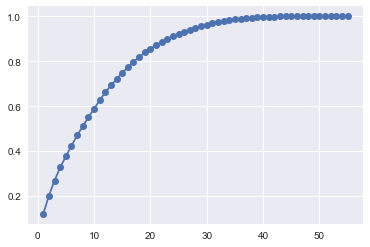

In [22]:
x = np.arange(1, len(df.columns))
plt.plot(x, np.cumsum(pca.explained_variance_ratio_), '-o')

We can clearly see that first 30 components amount to a cumulative of 0.95 variance

In [23]:
pca = PCA(n_components = 30)
pca_features = pca.fit_transform(features)

In [119]:
X_train, X_test, y_train, y_test = train_test_split(pca_features, labels, test_size=0.2, random_state=1, stratify = labels)

In [120]:
ptesting = pd.DataFrame(columns = ["Classifier", "F1-Score", "AUC", "Accuracy"])

# Logistic Regression

In [126]:
params = [
            {
                "penalty" : ['l2'], 
                "C" : [0.01, 0.1, 1.0, 10.0], 
                "solver" : ["sag"], 
                "max_iter" : [100, 200]
            },
            {
                "penalty" : ['l1'], 
                "C" : [0.01, 0.1, 1.0, 10.0], 
                "solver" : ["saga"], 
                "max_iter" : [100, 200]
            }
]
clf = GridSearchCV(estimator = LogisticRegression(n_jobs = -1, class_weight = "balanced"), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "f1")
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=-1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'C': [0.01, 0.1, 1.0, 10.0], 'max_iter': [100, 200], 'solver': ['sag'], 'penalty': ['l2']}, {'C': [0.01, 0.1, 1.0, 10.0], 'max_iter': [100, 200], 'solver': ['saga'], 'penalty': ['l1']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [127]:
clf.best_params_

{'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'sag'}

In [128]:
clf.best_score_

0.41575859559035505

In [129]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

ptesting.loc[-1] = ["Logistic Regression", f1, auc, acc]
ptesting.index = ptesting.index + 1
ptesting = ptesting.sort_index()

F1-Score on test data is : 0.417
Area under ROC on test data is : 0.736
Accuracy on test data is : 0.789


# Decision Tree Classifier

In [130]:
params = {
            "criterion" : ["gini", "entropy"], 
            "splitter" : ["best", "random"], 
            "max_depth" : [15, 20, 25, None],
            "min_samples_split" : [3, 6], 
            "min_samples_leaf" : [2, 4],  
        }
clf = GridSearchCV(estimator = DecisionTreeClassifier(class_weight = "balanced", presort = True), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "f1")
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=True, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 6], 'min_samples_leaf': [2, 4], 'max_depth': [15, 20, 25, None], 'splitter': ['best', 'random'], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [131]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 4,
 'min_samples_split': 3,
 'splitter': 'random'}

In [132]:
clf.best_score_

0.36270917684476173

In [133]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

ptesting.loc[-1] = ["Decision Tree", f1, auc, acc]
ptesting.index = ptesting.index + 1
ptesting = ptesting.sort_index()

F1-Score on test data is : 0.357
Area under ROC on test data is : 0.676
Accuracy on test data is : 0.780


# Random Forest Classifier

In [134]:
params = {
            "n_estimators" : [100, 200], 
            "criterion" : ["gini", "entropy"], 
            "max_depth" : [15, 25, None],
            "min_samples_split" : [3, 6], 
            "min_samples_leaf" : [2, 4]}
clf = GridSearchCV(estimator = RandomForestClassifier(class_weight = "balanced", n_jobs = -1), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "f1")
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 6], 'min_samples_leaf': [2, 4], 'n_estimators': [100, 200], 'max_depth': [15, 25, None], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [135]:
f1_score(y_test, clf.predict(X_test))

0.45629466739967017

In [136]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 4,
 'min_samples_split': 3,
 'n_estimators': 200}

In [137]:
clf.best_score_

0.45383081274562054

In [138]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

ptesting.loc[-1] = ["Random Forest", f1, auc, acc]
ptesting.index = ptesting.index + 1
ptesting = ptesting.sort_index()

F1-Score on test data is : 0.456
Area under ROC on test data is : 0.691
Accuracy on test data is : 0.880


# AdaBoost Classifier

In [147]:
params = {
            "base_estimator": [DecisionTreeClassifier(class_weight = "balanced"), 
                               LogisticRegression(n_jobs = -1, class_weight = 'balanced')], 
            "learning_rate" : [0.01, 0.1, 1.0]
        }
clf = GridSearchCV(estimator = AdaBoostClassifier(n_estimators = 500), param_grid = params, cv = cv, n_jobs = -1, scoring = "f1")
clf.fit(X_train, y_train)

C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs

C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs

C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs

C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs

C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs

C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs

C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs

C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs

C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs

C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs

C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs

C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs

C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
       error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=500, random_state=None),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'base_estimator': [DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_we...   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)], 'learning_rate': [0.01, 0.1, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [148]:
clf.best_params_

{'base_estimator': LogisticRegression(C=1.0, class_weight='balanced', dual=False,
           fit_intercept=True, intercept_scaling=1, max_iter=100,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=None,
           solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
 'learning_rate': 1.0}

In [149]:
clf.best_score_

0.41125292332879254

In [150]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

ptesting.loc[-1] = ["AdaBoost", f1, auc, acc]
ptesting.index = ptesting.index + 1
ptesting = ptesting.sort_index()

F1-Score on test data is : 0.414
Area under ROC on test data is : 0.736
Accuracy on test data is : 0.785


# Gaussian Naive Bayes

In [ ]:
params = {}
clf = GridSearchCV(estimator = GaussianNB(), param_grid = params, cv = cv, n_jobs = -1, scoring = "f1")
clf.fit(X_train, y_train)

In [ ]:
clf.best_score_

In [ ]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

ptesting.loc[-1] = ["Gaussian Naive Bayes", f1, auc, acc]
ptesting.index = ptesting.index + 1
ptesting = ptesting.sort_index()

# Multinomial Naive Bayes

In [ ]:
params = {
            "alpha" : [0.0, 0.1, 0.5, 1.0], 
            "fit_prior" : [True, False]
         }
clf = GridSearchCV(estimator = MultinomialNB(), param_grid = params, cv = cv, n_jobs = -1, scoring = "f1")
X_train = scaler.fit_transform(X_train)
clf.fit(X_train, y_train)

In [ ]:
clf.best_params_

In [ ]:
clf.best_score_

In [ ]:
X_test = scaler.fit_transform(X_test)
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

ptesting.loc[-1] = ["Multinomial Naive Bayes", f1, auc, acc]
ptesting.index = ptesting.index + 1
ptesting = ptesting.sort_index()

# Multi Layer Perceptron

In [152]:
params = [
            {
                "hidden_layer_sizes" : [(50, ), (50, 50), (50, 50, 50)],
                "solver" : ["adam", "lbfgs"]
            },
            {
                "hidden_layer_sizes" : [(50, ), (50, 50), (50, 50, 50)],
                "solver" : ["sgd"], 
                "learning_rate" : ["constant", "invscaling", "adaptive"]
            }
]
clf = GridSearchCV(estimator = MLPClassifier(early_stopping = True, activation = "relu", max_iter = 200), param_grid = params, 
                   cv = cv, n_jobs = -1, scoring = "f1")
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
       error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'hidden_layer_sizes': [(50,), (50, 50), (50, 50, 50)], 'solver': ['adam', 'lbfgs']}, {'hidden_layer_sizes': [(50,), (50, 50), (50, 50, 50)], 'solver': ['sgd'], 'learning_rate': ['constant', 'invscaling', 'adaptive']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [153]:
clf.best_params_

{'hidden_layer_sizes': (50, 50, 50), 'solver': 'lbfgs'}

In [154]:
clf.best_score_

0.35766695601335707

In [155]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

ptesting.loc[-1] = ["Multi Layer Perceptron", f1, auc, acc]
ptesting.index = ptesting.index + 1
ptesting = ptesting.sort_index()

F1-Score on test data is : 0.352
Area under ROC on test data is : 0.622
Accuracy on test data is : 0.881


# Support Vector Machine

In [156]:
params = [
            {"C" : [0.3, 1.0, 3.0], "kernel" : ["poly"],
              "degree" : [2, 3, 4],
              "gamma" : ["auto", 0.1, 0.3]
            },
            {"C" : [0.3, 1.0, 3.0], "kernel" : ["rbf", "sigmoid"], 
              "gamma" : ["auto", 0.1, 0.3]},
            {"C" : [0.3, 1.0, 3.0], "kernel" : ["linear"]}
        ]
clf = GridSearchCV(estimator = SVC(class_weight = "balanced", max_iter = 5000, verbose = True), param_grid = params, 
                   cv = cv, n_jobs = -1, scoring = "f1", verbose = 2)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 23.2min finished


[LibSVM]

C:\Python35\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=5000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'degree': [2, 3, 4], 'gamma': ['auto', 0.1, 0.3], 'C': [0.3, 1.0, 3.0], 'kernel': ['poly']}, {'gamma': ['auto', 0.1, 0.3], 'C': [0.3, 1.0, 3.0], 'kernel': ['rbf', 'sigmoid']}, {'C': [0.3, 1.0, 3.0], 'kernel': ['linear']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=2)

In [157]:
clf.best_params_

{'C': 3.0, 'gamma': 0.1, 'kernel': 'sigmoid'}

In [158]:
clf.best_score_

0.25354134398277001

In [159]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

ptesting.loc[-1] = ["Support Vector Machine", f1, auc, acc]
ptesting.index = ptesting.index + 1
ptesting = ptesting.sort_index()

F1-Score on test data is : 0.267
Area under ROC on test data is : 0.630
Accuracy on test data is : 0.530


In [160]:
ptesting

,Classifier,F1-Score,AUC,Accuracy
0,Support Vector Machine,0.266818,0.629994,0.530347
1,Multi Layer Perceptron,0.352085,0.621636,0.881160
2,AdaBoost,0.413519,0.735933,0.785142
3,Random Forest,0.456295,0.691041,0.879947
4,Decision Tree,0.356661,0.675741,0.780165
5,Logistic Regression,0.416667,0.736377,0.789269


# Recursive Feature Elimination

In [161]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=1, stratify = labels)

In [162]:
# DataFrame to store results
rtesting = pd.DataFrame(columns = ["Classifier", "F1-Score", "AUC", "Accuracy"])

# Logistic Regression

In [163]:
clf = RFE(estimator = LogisticRegression(n_jobs = -1, class_weight = "balanced", penalty = 'l2', solver = 'sag'))
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

C:\Python35\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Python35\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Python35\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Python35\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Python35\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Py

In [164]:
f1 = f1_score(y_test, predictions)
auc = roc_auc_score(y_test, predictions)
acc = accuracy_score(y_test, predictions)

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

rtesting.loc[-1] = ["Logistic Regression", f1, auc, acc]
rtesting.index = rtesting.index + 1
rtesting = rtesting.sort_index()

F1-Score on test data is : 0.584
Area under ROC on test data is : 0.861
Accuracy on test data is : 0.862


# Decision Tree Classifier

In [165]:
clf = RFE(estimator = DecisionTreeClassifier(class_weight = "balanced", presort = True, criterion = "entropy", 
                                             min_samples_leaf = 4, min_samples_split = 6, splitter = "random"))
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [166]:
f1 = f1_score(y_test, predictions)
auc = roc_auc_score(y_test, predictions)
acc = accuracy_score(y_test, predictions)

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

rtesting.loc[-1] = ["Decision Tree", f1, auc, acc]
rtesting.index = rtesting.index + 1
rtesting = rtesting.sort_index()

F1-Score on test data is : 0.569
Area under ROC on test data is : 0.826
Accuracy on test data is : 0.869


# Random Forest Classifier

In [167]:
clf = RFE(estimator = RandomForestClassifier(class_weight = "balanced", n_jobs = -1, criterion = "entropy", 
                                             min_samples_leaf = 4, min_samples_split = 6, n_estimators = 200))
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [168]:
f1 = f1_score(y_test, predictions)
auc = roc_auc_score(y_test, predictions)
acc = accuracy_score(y_test, predictions)

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

rtesting.loc[-1] = ["Random Forest", f1, auc, acc]
rtesting.index = rtesting.index + 1
rtesting = rtesting.sort_index()

F1-Score on test data is : 0.651
Area under ROC on test data is : 0.870
Accuracy on test data is : 0.899


# Multinomial Naive Bayes

In [172]:
clf = RFE(estimator = MultinomialNB(alpha = 0, fit_prior = True))
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

C:\Python35\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Python35\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Python35\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Python35\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Python35\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Python35\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will res

In [173]:
f1 = f1_score(y_test, predictions)
auc = roc_auc_score(y_test, predictions)
acc = accuracy_score(y_test, predictions)

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

rtesting.loc[-1] = ["Multinomial Naive Bayes", f1, auc, acc]
rtesting.index = rtesting.index + 1
rtesting = rtesting.sort_index()

F1-Score on test data is : 0.109
Area under ROC on test data is : 0.527
Accuracy on test data is : 0.887


In [176]:
rtesting

,Classifier,F1-Score,AUC,Accuracy
0,Multinomial Naive Bayes,0.108987,0.526539,0.886866
1,Random Forest,0.651222,0.870454,0.899490
2,Decision Tree,0.569268,0.825798,0.868657
3,Logistic Regression,0.584097,0.860745,0.862224


# Conclusion

We can see from the above results that feature selection/transformation/elimination techniques overall fail to improve the classification scores. And as for the original features, RandomForestClassifier turns out to be the best classifier in terms of F1-score and Area under ROC.

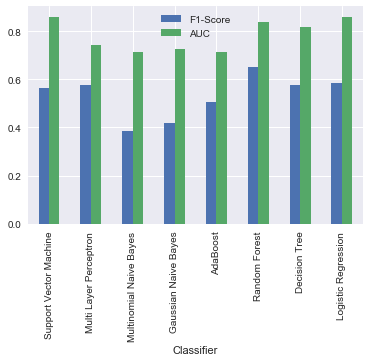

In [177]:
testing.drop(["Accuracy"], axis = 1).set_index("Classifier").plot.bar()

# Validating final model

Using the best parameters we retrain the Random Forest Classifier

In [26]:
# DataFrame to store results
ftesting = pd.DataFrame(columns = ["Random State", "F1-Score", "AUC", "Accuracy"])

In [27]:
def final_model(i):
    cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = i)
    params = {
                'criterion': ['entropy'],
                'max_depth': [40],
                'min_samples_leaf': [2],
                'min_samples_split': [6],
                'n_estimators': [200]
             }
    clf = GridSearchCV(RandomForestClassifier(class_weight = "balanced", n_jobs = -1), param_grid = params, cv = cv, n_jobs = -1,
                       scoring = "f1")
    clf.fit(X_train, y_train)
    f1 = f1_score(y_test, clf.predict(X_test))
    auc = roc_auc_score(y_test, clf.predict(X_test))
    acc = accuracy_score(y_test, clf.predict(X_test))
    
    return f1, auc, acc

In [28]:
for i in range(10):
    f1, auc, acc = final_model(i)
    ftesting.loc[-1] = [i, f1, auc, acc]
    ftesting.index = ftesting.index + 1
    ftesting = ftesting.sort_index()

In [29]:
ftesting

,Random State,F1-Score,AUC,Accuracy
0,9.0,0.654240,0.842939,0.909930
1,8.0,0.655399,0.841604,0.910901
2,7.0,0.653700,0.837644,0.911386
3,6.0,0.652869,0.839449,0.910415
4,5.0,0.650140,0.839235,0.909201
5,4.0,0.658287,0.845838,0.910901
6,3.0,0.650260,0.836088,0.910294
7,2.0,0.654100,0.839723,0.910901
8,1.0,0.654801,0.841869,0.910537
9,0.0,0.660422,0.845513,0.911993


In [33]:
ftesting.drop(["Random State"], axis = 1).describe().T

,count,mean,std,min,25%,50%,75%,max
F1-Score,10.0,0.654422,0.003175,0.650140,0.653077,0.654170,0.655250,0.660422
AUC,10.0,0.840990,0.003183,0.836088,0.839289,0.840663,0.842671,0.845838
Accuracy,10.0,0.910646,0.000771,0.909201,0.910324,0.910719,0.910901,0.911993


The standard deviation of the scores is really low, which means that the changing the random states for the cross validation doesn't affect the scores much.